## LDA-analysis
Here we import our LDA_model and initialize it using our dataset. 

In [11]:
# !python -m spacy download nb_core_news_md # Uncomment to download Norsk Bokmål language package.

In [12]:
from src.models.LDA import LDA, plot_topic_distribution, plot_coherence_scores
import pandas as pd

dataframe = pd.read_csv('../../dataset/nou_hearings_full_text.csv')
texts = dataframe.text.tolist()
lda = LDA(data=texts, no_below=5, no_above=0.5, language='/Users/nicolaisivesind/miniconda3/lib/python3.11/site-packages/nb_core_news_md/nb_core_news_md-3.7.0')

### Estimate optimal number of topics

Building LDA-models: 100%|██████████| 51/51 [04:20<00:00,  5.11s/it]


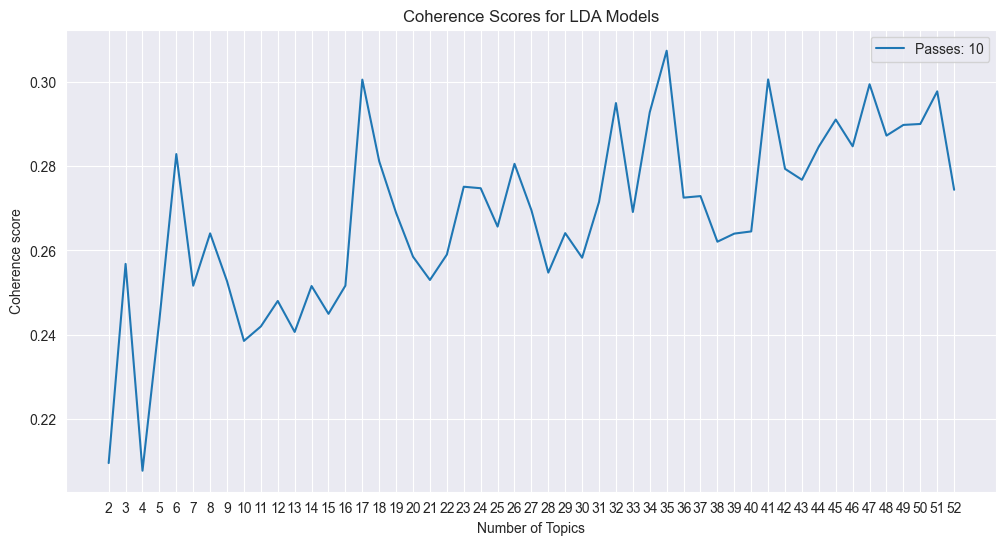

In [13]:
coherence_values, model_list, topic_range, passes = lda.calculate_lda_model_coherences(topic_interval=(2, 52), passes=10)

plot_coherence_scores(topic_range=topic_range, coherence_values=coherence_values, passes=passes)
#plot_coherence_scores(topic_range=topic_range, coherence_values=coherence_values, passes=passes, savefig='../../plots/LDA_coherence-Large')

### Select optimal model

In [19]:
best_model = model_list[coherence_values.index(max(coherence_values))]

### Print topics

In [21]:
topics = best_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(34, '0.004*"nødvendig" + 0.003*"resultat" + 0.003*"støtte" + 0.003*"natur" + 0.003*"tonn" + 0.003*"følge" + 0.003*"hensyn" + 0.003*"behov" + 0.003*"produksjon" + 0.003*"million"')
(20, '0.010*"kultur" + 0.007*"omstillingsprosesse" + 0.007*"gi" + 0.007*"utforske" + 0.005*"måte" + 0.005*"klimaendring" + 0.005*"høring" + 0.005*"sammenheng" + 0.005*"eksempel" + 0.005*"basere"')
(15, '0.005*"klima" + 0.005*"dag" + 0.004*"fn" + 0.004*"liten" + 0.004*"gjennomføre" + 0.004*"mål" + 0.004*"global" + 0.004*"deres" + 0.004*"mulighet" + 0.004*"of"')
(14, '0.006*"måte" + 0.006*"the" + 0.006*"tanke" + 0.006*"of" + 0.006*"a" + 0.006*"vann" + 0.006*"tilstand" + 0.005*"tverrfaglig" + 0.005*"fremre" + 0.005*"veivalg klimapolitikk rapport klimautvalget"')
(30, '0.005*"tilnærmet" + 0.005*"klimamål" + 0.005*"lære" + 0.004*"formulere" + 0.004*"omstilling lavutslipp" + 0.004*"veivalg klimapolitikk" + 0.004*"bygning" + 0.004*"finnes" + 0.004*"høringsuttalelse" + 0.004*"fordi"')
(23, '0.044*"vedlagt" + 0.041*"

### Calculate text-topic pairs

In [16]:
predictions = lda.predict_topics(model=best_model, relevancy=False)
dataframe['topic_predictions'] = predictions

dataframe.head(n=100)

,actor,text,date,label,topic_predictions
0,Abelia,Abelia er foreningen for kunnskaps- og teknolo...,30.01.2024,Interessegruppe,"{'topic': 19, 'confidence': 0.99}"
1,Advokatforeningen,Advokatforeningens tillitsvalgte advokater utf...,28.02.2024,Interessegruppe,"{'topic': 6, 'confidence': 0.66}"
2,Agder fylkeskommune,Agder fylkeskommunes høringssvar til NOU 2023:...,27.02.2024,Offentlig forvaltning,"{'topic': 28, 'confidence': 0.95}"
3,Akademikerne,Akademikerne viser til brev av 31. oktober 202...,05.02.2024,Interessegruppe,"{'topic': 6, 'confidence': 0.95}"
4,Alliansen ny landbrukspolitikk,"Takk for det grundige arbeidet med utredning, ...",28.02.2024,Interessegruppe,"{'topic': 12, 'confidence': 0.99}"
...,...,...,...,...,...
95,NHO Logistikk og Transport - Ole A. Hagen (nær...,"Hei, Vedlagt kan dere finne vårt høringssvar. ...",28.02.2024,Interessegruppe,"{'topic': 34, 'confidence': 0.51}"
96,NHO Transport,"NHO Transport viser til vedlagte dokument, som...",28.02.2024,Interessegruppe,"{'topic': 20, 'confidence': 0.5}"
97,NIBIO,NIBIOs høringssvar av NOU 2023: 25 Omstilling ...,28.02.2024,Offentlig forvaltning,"{'topic': 21, 'confidence': 0.76}"
98,Norad,Høringsvar fra Norad er lagt ved som pdf.,28.02.2024,Interessegruppe,"{'topic': 0, 'confidence': 0.03}"


## Plot distributions

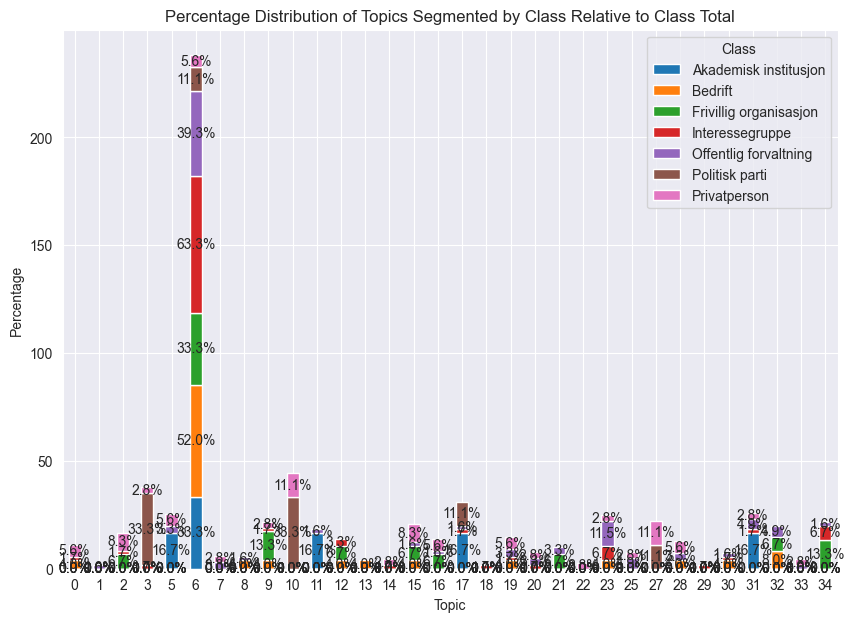

In [17]:
plot_topic_distribution(dataframe)

### Extract arguments

In [18]:
arguments_df = lda.extract_arguments(dataframe, best_model)
arguments_df.to_csv('../../dataset/LDA-Arguments.csv', index=False)

Processing Documents: 100%|██████████| 212/212 [00:27<00:00,  7.67it/s]
